In [9]:
# Importing all the library needed
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage import io, color
from PIL import Image


Stores image paths in a list:

1. Defines a list of image paths named 'store_images'.
2. Initializes an empty list named 'images'.


In [10]:
store_images=["../images/IMAGE1.jpg","../images/IMAGE2.png","../images/IMAGE3.jpg","../images/IMAGE4.jpg"]
images=[]

Loads images using OpenCV:

1. For each image path in 'store_images':
2. Read the image using OpenCV.
3. If loaded, add it to the 'images' list.
4. Print error message for unsuccessful loads.


In [11]:
for an_image in store_images:   
    current_image=cv2.imread(an_image)
    if current_image is None:
        print(f"Error loading image: {current_image}")
    images.append(current_image)

Displays 4 images in a 2x2 grid using matplotlib:

1. Creates a 10x6-inch figure.
2. Loops for each of the 4 images.
3. Sets up subplots in a grid.
4. Converts image colors to RGB.
5. Displays the grid.


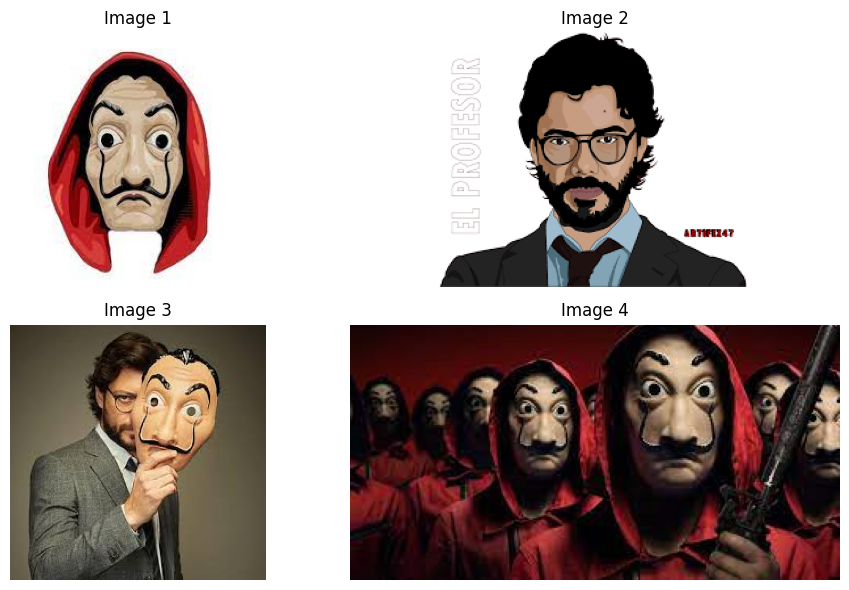

In [12]:
# Display Images in a 2x2 Grid
plt.figure(figsize=(10, 6))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Converts images to grayscale manually:

1. Creates a folder for grayscale images.
2. Loads each image from the 'images' list.
3. Manually calculates grayscale values for each pixel.
4. Constructs a grayscale image as a list of lists.
5. Converts the grayscale list to a numpy array.
6. Generates filenames and filepaths.
7. Uses OpenCV to save the grayscale images.


In [13]:

grayscale_folder = "../images/Grayscale_Manual/" 
os.makedirs(grayscale_folder, exist_ok=True)

for i, img in enumerate(images):
    gray_img = [] # Grayscale image
    for row in img:
        gray_row = []
        for pixel in row:
            gray_value = int(0.299 * pixel[2] + 0.587 * pixel[1] + 0.114 * pixel[0])
            gray_row.append(gray_value)
        gray_img.append(gray_row)

    gray_array = np.array(gray_img, dtype=np.uint8)
    filename = f"IMAGE{i+1}.jpg"
    filepath = os.path.join(grayscale_folder, filename)
    
    # Save as an image
    cv2.imwrite(filepath, gray_array)


Converts images to grayscale and saves using scikit-image:

1. Creates a folder for grayscale images.
2. Loads images using scikit-image's `io.imread()`.
3. Normalizes images to a [0, 1] float range.
4. Converts images to grayscale using `color.rgb2gray()`.
5. Generates filenames and filepaths.
6. Saves grayscale images using scikit-image's `io.imsave()`.

In [ ]:
scgrayscale_folder = "../images/Grayscale_scikit/"
os.makedirs(scgrayscale_folder, exist_ok=True)

for i, imagepath in enumerate(store_images):
    img = io.imread(imagepath)  
    normalized_img = img.astype(float) / 255.0
    gray_img = color.rgb2gray(normalized_img)
    scfilename = f"IMAGE{i+1}.jpg"
    scfilepath = os.path.join(scgrayscale_folder, scfilename)  
    io.imsave(scfilepath, (gray_img * 255).astype('uint8'))

Converts images to grayscale using PIL:

1. Creates a folder for grayscale images.
2. Loads images using PIL.
3. Converts images to grayscale.
4. Saves grayscale images with new filenames.


In [ ]:
grayscale_folder = "../images/Grayscale_PIL/"
os.makedirs(grayscale_folder, exist_ok=True)

for i, imagepath in enumerate(store_images):
    img = Image.open(imagepath)  # Load image using PIL
    gray_image = img.convert("L")  # Convert to grayscale
    filename = f"IMAGE{i+1}.jpg"
    filepath = os.path.join(grayscale_folder, filename)
    gray_image.save(filepath)